In [1]:
#Importing necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
import seaborn as sns

In [2]:
#Importing and Reading the dataset
df = pd.read_csv("/content/Advertising.csv")
df.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
#Printing the shape of the dataset
df.shape

(200, 5)

In [4]:
# Check for duplicate rows
duplicates = df.duplicated()
sum_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {sum_duplicates}")

duplicate_rows = df[duplicates]
print("\nDuplicate Rows:")
print(duplicate_rows)

df.drop_duplicates(inplace=True)

Number of duplicate rows: 0

Duplicate Rows:
Empty DataFrame
Columns: [Unnamed: 0, TV, Radio, Newspaper, Sales]
Index: []


In [5]:
#Checking for null values
null_values = df.isnull()
null_counts = null_values.sum()

print("Null Value Counts:")
print(null_counts)

Null Value Counts:
Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


In [6]:
#Printing the columns of the dataset
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
#Drpping the unnecessary column
df = df.drop(['Unnamed: 0'], axis=1)
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


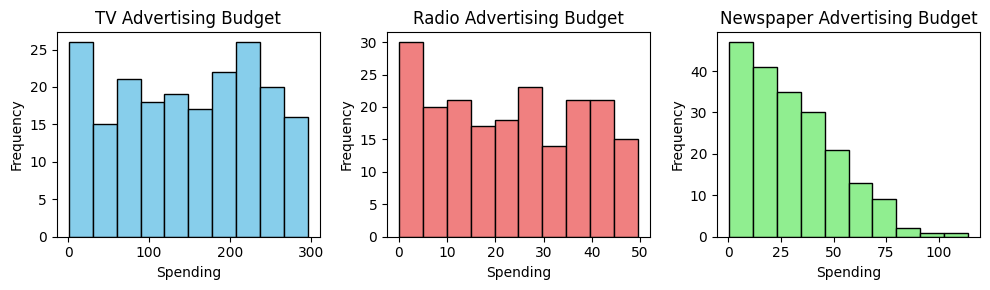

In [9]:
#Creating subplots for each histogram

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

#Plotting histograms for 'TV,' 'Radio,' and 'Newspaper' columns
df["TV"].plot.hist(ax=axes[0], bins=10, color='skyblue', edgecolor='black')
axes[0].set_title('TV Advertising Budget')
axes[0].set_xlabel('Spending')
axes[0].set_ylabel('Frequency')

df["Radio"].plot.hist(ax=axes[1], bins=10, color='lightcoral', edgecolor='black')
axes[1].set_title('Radio Advertising Budget')
axes[1].set_xlabel('Spending')
axes[1].set_ylabel('Frequency')

df["Newspaper"].plot.hist(ax=axes[2], bins=10, color='lightgreen', edgecolor='black')
axes[2].set_title('Newspaper Advertising Budget')
axes[2].set_xlabel('Spending')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

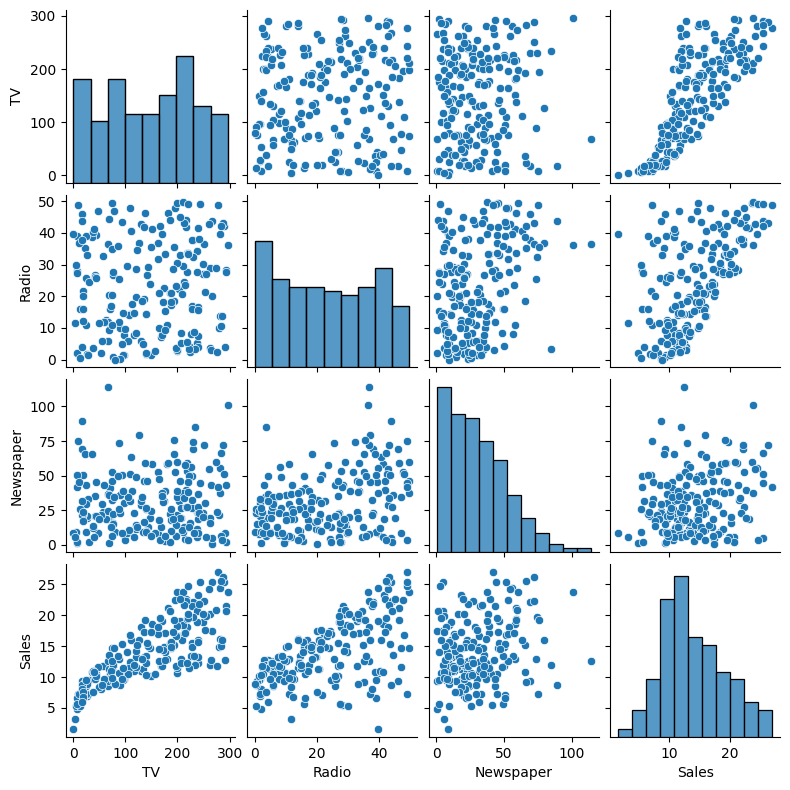

In [10]:
sns.pairplot(df, height=2)
plt.show()

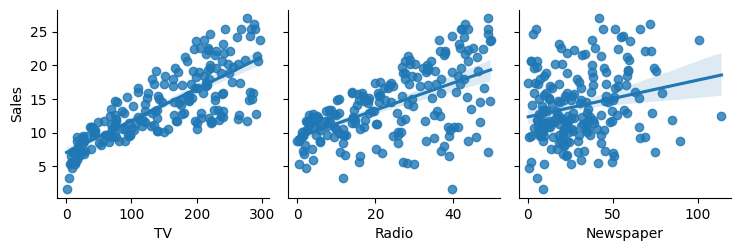

In [11]:
#Scatter plots to check the linearity assumption between each independent variable (TV, Radio, Newspaper) and the dependent variable (Sales)
sns.pairplot(df, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="reg")

<Axes: >

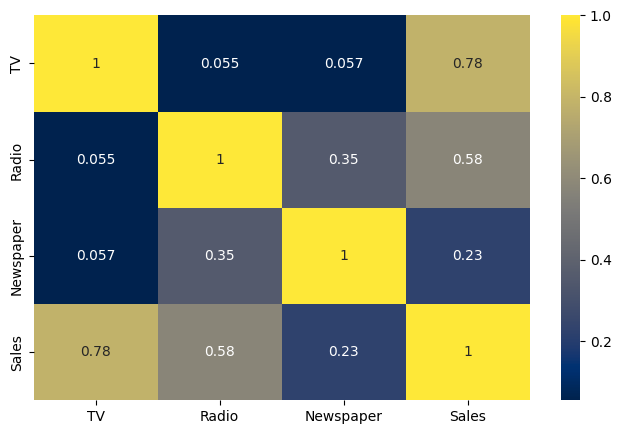

In [12]:
#Correlation Heatmap to check for multicollinearity among independent/dependent variables

plt.figure(figsize = (8,5))
sns.heatmap(df.corr() , annot = True , cmap = "cividis")

In [13]:
df.corr()[["Sales"]].sort_values(by="Sales")

,Sales
Newspaper,0.228299
Radio,0.576223
TV,0.782224
Sales,1.000000


In [14]:
#Define input features (X) and target variable (y)
X=df.drop('Sales',axis=1)
y=df['Sales']

In [15]:
#Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=75)

In [16]:
#Creating a Linear Regression model
from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()

#Fitting the model on the training data
model_linear.fit(X_train, y_train)

LinearRegression()

In [17]:
#Making predictions on the test set
y_pred = model_linear.predict(X_test)

In [18]:
#Evaluating the model to test accuracy
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [19]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

1.1992079846254662
2.597270764476298
0.9077086876495712


In [20]:
#Creating a Random Forest Regression model
from sklearn.ensemble import RandomForestRegressor
model_RF=RandomForestRegressor(n_estimators=100, random_state=45)

#Fitting the model on the training data
model_RF.fit(X_train,y_train)

RandomForestRegressor(random_state=45)

In [21]:
#Making predictions on the test set

y_pred = model_RF.predict(X_test)

In [22]:
#Evaluating the model to test accuracy
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.5612
0.43859910000000024
0.9844148376486735


In [23]:
#Creating a Linear Regression model
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=0.01)

In [24]:
#Fitting the model on the training data
model_lasso.fit(X_train,y_train)

#Making predictions on the test set
y_pred = model_lasso.predict(X_test)

In [25]:
#Evaluating the model to test accuracy
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

1.1991244922392916
2.5968536097873502
0.9077235108071037


In [26]:
#Creating a Gradient Boost Regression model
from sklearn.ensemble import GradientBoostingRegressor

model_GB = GradientBoostingRegressor(n_estimators=100, random_state=45)  # You can adjust the number of trees (n_estimators)

# Fit the model on the training data
model_GB.fit(X_train, y_train)

GradientBoostingRegressor(random_state=45)

In [27]:
#Making predictions on the test set
y_pred = model_GB.predict(X_test)

In [28]:
#Evaluating the model to test accuracy
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.5161264411389126
0.3922694755346222
0.9860611126158791


In [29]:
import random

random.seed(42)
sample_data=df[['TV','Radio','Newspaper']].sample(10)
sample_data

,TV,Radio,Newspaper
43,206.9,8.4,26.4
171,164.5,20.9,47.4
183,287.6,43.0,71.8
46,89.7,9.9,35.7
57,136.2,19.2,16.6
60,53.5,2.0,21.4
63,102.7,29.6,8.4
32,97.2,1.5,30.0
41,177.0,33.4,38.7
117,76.4,0.8,14.8


In [30]:
# Make predictions using the four models
linear_predictions = model_linear.predict(sample_data)
forest_predictions = model_RF.predict(sample_data)
lasso_predictions = model_lasso.predict(sample_data)
gb_predictions = model_GB.predict(sample_data)

In [31]:
# Create a table with original value (Sales from sample data) and predictions
sample_data['Original Value'] = df.loc[sample_data.index, 'Sales']

predictions_table = pd.DataFrame({
    'Original Value': sample_data['Original Value'],
    'Linear Regression Prediction': linear_predictions,
    'Random Forest Prediction': forest_predictions,
    'Lasso Prediction': lasso_predictions,
    'Gradient Boosting Prediction': gb_predictions

})

In [32]:
predictions_table

,Original Value,Linear Regression Prediction,Random Forest Prediction,Lasso Prediction,Gradient Boosting Prediction
43,12.9,13.983721,13.035,13.984418,13.011082
171,14.5,14.337753,14.668,14.338505,14.728753
183,26.2,24.124992,25.746,24.125049,26.077558
46,10.6,8.841933,10.253,8.843069,10.293723
57,13.2,12.814005,13.470,12.813762,13.171311
60,8.1,5.721168,8.220,5.722332,8.052786
63,14.0,13.275666,13.730,13.274509,13.825202
32,9.6,7.609544,9.836,7.610991,9.318370
41,17.1,17.318118,17.754,17.317730,17.055215
117,9.4,6.569345,9.406,6.570303,9.144638


In [33]:
# Model Testing

GB = GradientBoostingRegressor(n_estimators=100, random_state=45)
GB.fit(X_train, y_train)

GradientBoostingRegressor(random_state=45)

In [34]:
tv = float(input("Enter the TV value: "))
radio = float(input("Enter the Radio value: "))
news = float(input("Enter the Newspaper value: "))

new_data = pd.DataFrame({
    "TV": [tv],
    "Radio": [radio],
    "Newspaper": [news]
})

print("-------------------------------------")
new_pred = GB.predict(new_data)
print("Predicted Sales : {}".format(abs(new_pred)))

Enter the TV value: 300
Enter the Radio value: 100
Enter the Newspaper value: 250
-------------------------------------
Predicted Sales : [27.12054085]
